## Importing Libraries

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading Dataset

In [12]:
df = pd.read_csv('heart_disease_balanced.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [3]:
print(df.describe())

             age        sex         cp    trestbps        chol        fbs  \
count  15.000000  15.000000  15.000000   15.000000   15.000000  15.000000   
mean   52.466667   0.666667   1.266667  134.333333  227.866667   0.266667   
std     7.520132   0.487950   1.032796   15.168890   48.246194   0.457738   
min    37.000000   0.000000   0.000000  110.000000  168.000000   0.000000   
25%    47.500000   0.000000   0.500000  122.500000  195.500000   0.000000   
50%    56.000000   1.000000   1.000000  135.000000  215.000000   0.000000   
75%    57.000000   1.000000   2.000000  140.000000  243.000000   0.500000   
max    63.000000   1.000000   3.000000  172.000000  354.000000   1.000000   

         restecg     thalach      exang    oldpeak      slope         ca  \
count  15.000000   15.000000  15.000000  15.000000  15.000000  15.000000   
mean    0.666667  163.666667   0.200000   1.173333   1.200000   0.133333   
std     0.487950   12.075161   0.414039   0.853954   0.861892   0.351866   
mi

## Correlation Matrix

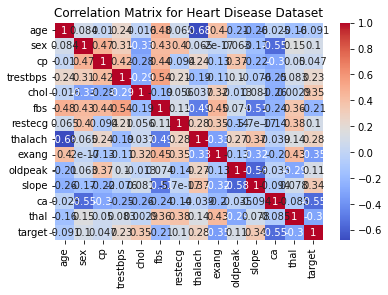

In [6]:
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Heart Disease Dataset")
plt.show()

## Histplot

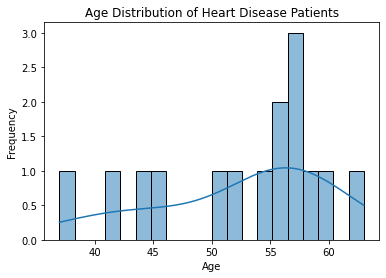

In [7]:
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution of Heart Disease Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

## Train , Test , Classification Report , Accuracy Score

In [13]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.6666666666666666

Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      0.50      0.67         2

    accuracy                           0.67         3
   macro avg       0.75      0.75      0.67         3
weighted avg       0.83      0.67      0.67         3



## Confusion Matrix

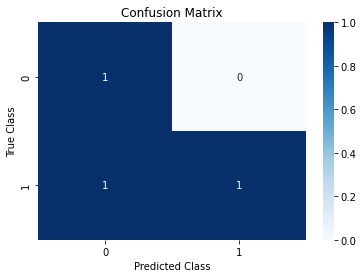

In [14]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()